## Mud card
- Can you explain how logistic regression deal with outliers again?

<center><img src="figures/logistic_reg.png" width="600"></center>

- What happens if you use a decision tree with a dataset that has even amounts of class 1, 2 and 3?
   - I'm not sure I understand the problem.
- If each tree in random forest is created based on a subset of the features (and data?), shouldn't number of features used in the subset be considered as a tuning parameter?
   - you can tune it if you want, it's the `max_features` parameter in sklearn random forests.
   - by default, `max_features = sqrt(n_ftrs)`.
   - by default, the data points are bootstrapped meaning that ~60% of the points are used in each tree. 

## Supervised ML algorithms and Cross Validation
By the end of this lecture, you will be able to
- Summarize how support vector machines work and describe its properties
- Describe why CV is necessary
- Apply simple CV techniques to data

## <font color='lightgray'>Supervised ML algorithms and Cross Validation</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- **Summarize how support vector machines work and describe its properties**
- <font color='lightgray'>Describe why CV is necessary</font>
- <font color='lightgray'>Apply simple CV techniques to data</font>

### <center>Exercise 1 </center>
- Create a decision tree with max_depth = 2 to predict the target variable! What is your tree's prediction for each person?
- Remember, your tree does not need predict everyone perfectly.
- It just needs to get as many people as possible right.

| X|age|gender (M=0, F=1)|is student?|is parent?|uses computer for work?|nr. of hours on c.|<font color='red'>Like computer games?</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__person 1__| 5|0|1|0|0|0.0|__<font color='red'>1</font>__|
|__person 2__|48|1|0|1|0|1.8|__<font color='red'>1</font>__|
|__person 3__|62|0|0|1|0|0.2|__<font color='red'>0</font>__|
|__person 4__|10|1|1|0|0|2.4|__<font color='red'>1</font>__|
|__person 5__|23|1|1|0|1|4.2|__<font color='red'>0</font>__|
|__person 6__|36|0|0|0|1|3.1|__<font color='red'>1</font>__|
|__person 7__|12|0|1|0|0|3.1|__<font color='red'>1</font>__|
|__person 8__|85|0|0|0|1|1.0|__<font color='red'>0</font>__|
|__person 9__|33|1|1|1|0|1.5|__<font color='red'>0</font>__|
|__person 10__|56|0|0|0|1|0.1|__<font color='red'>1</font>__|

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so|constant|yes|max_depth, min_samples_split|no|so so|
| random forest classification 	|so so|step-like, difficult to tell|yes|max_depth, min_samples_split|no|so so|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## Support Vector Machine
- very versatile technique, it comes in lots of flavors/types, read more about it [here](https://scikit-learn.org/stable/modules/svm.html)
- SVM classifier motivation
   - points in n_ftrs dimensional space with class 0 and 1
   - we want to find the (n_ftrs-1) dimensional hyperplane that best separates the points
   - this hyperplane is our (linear) decision boundary
- we cover SVMs with radial basis functions (rbf)
   - we apply a kernel function (a non-linear transformation) to the data points
   - the kernel function basically "smears" the  points
   - gaussian rbf kernel: $\exp(-\gamma (|x - x'|)^2)$ where $\gamma > 0$

## SVR

In [1]:
import numpy as np
from sklearn.svm import SVR
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = SVR(gamma = 1, C = 1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e6')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 0.001, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e-3')
plt.legend()

plt.tight_layout()
plt.savefig('figures/SVM_reg.png',dpi=300)
plt.show()


<Figure size 1200x800 with 4 Axes>

<center><img src="figures/SVM_reg.png" width="800"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_depth, min_samples_split| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_depth, min_samples_split| no|so so|
| SVM rbf regression               	|<font color='red'>no</font>|<font color='red'>non-linear extrapolation</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so</font>|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## SVC

In [48]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.svm import SVC

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = SVC(gamma = 1, C = 1, probability=True)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

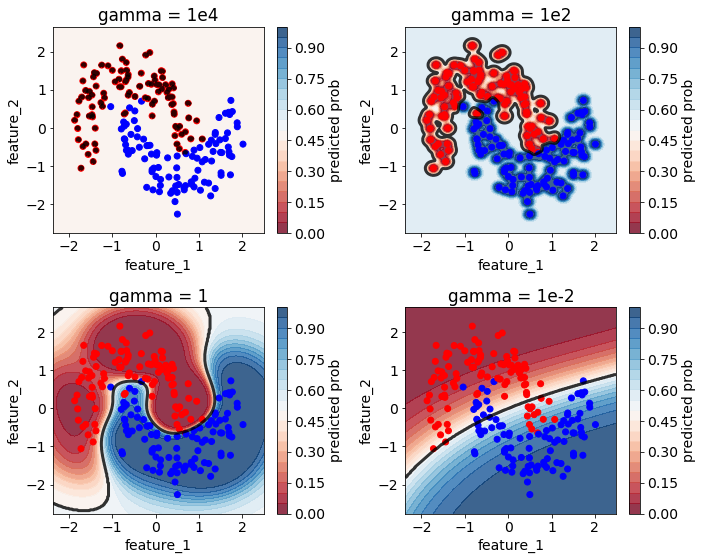

In [49]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = SVC(gamma = 1e4, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e4')

plt.subplot(2,2,2)
clf = SVC(gamma = 1e2, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e2')

plt.subplot(2,2,3)
clf = SVC(gamma = 1e0, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1')

plt.subplot(2,2,4)
clf = SVC(gamma = 1e-2, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e-2')


plt.tight_layout()

plt.savefig('figures/SVM_clf.png',dpi=300)
plt.show()




<center><img src="figures/SVM_clf.png" width="800"></center>

## Exercise 2
Identify high bias and high variance models!

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_depth, min_samples_split| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_depth, min_samples_split| no|so so|
| SVM rbf regression               	|no|non-linear extrapolation|yes|C, gamma|yes|so so|
| SVM rbf classification           	|<font color='red'>no</font>|<font color='red'>50-50</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so </font>|

## <font color='lightgray'>Supervised ML algorithms and Cross Validation</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- <font color='lightgray'>Summarize how support vector machines work and describe its properties</font>
- **Describe why CV is necessary**
- <font color='lightgray'>Apply simple CV techniques to data</font>

## The goals of cross validation
- we want to find the best hyper-parameters of our ML algorithms
   - fit model to training data (`.fit(X_train,y_train)`)
   - evaluate model on test set (`.predict(X_test,y_test)`)
   - we find hyper-parameter values that optimize the test score
- we want to know how the model will perform on previously unseen data
   - apply our final model on the holdout set (`.predict(X_holdout,y_holdout)`)
   
### We need to split the data into three parts!

## The three things you need to know to do cross validation correctly
- preprocessors with sklearn pipeline
   - apply fit_transform to training set (`preprocessors.fit_transform(X_train)`)
   - transform test and holdout (`preprocessors.transform(X_test)`, `preprocessors.transform(X_holdout)`)
   - this avoids data leakage
      - the properties (e.g., mean, std) of the test and holdout sets must not impact the training set!
- supervised ML algorithms and what hyperparameters they have
   - we want to find the best hyperparameter values
   - e.g., in an elastic net, what alpha and rho gives us the best performance on the test set?
      - depending on the evaluation metric you use, some metrics are maximized (e.g., accuracy), other metrics are minimized (e.g., RMSE)
- **Last bit of knowledge we need: how to split the data?**

## How should we split the data into train/test/holdout?

- data is **Independent and Identically Distributed** (iid)
   - all samples stem from the same generative process and that the generative process is assumed to have no memory of past generated samples
   - identify cats and dogs on images
   - predict the house price
   - predict if someone's salary is above or below 50k
- examples of not iid data (more on this next time):
   - data generated by time-dependent processes
   - data has group structure (samples collected from e.g., different subjects, experiments, measurement devices)

## <font color='lightgray'>Supervised ML algorithms and Cross Validation</font>
<font color='lightgray'>By the end of this lecture, you will be able to</font>
- <font color='lightgray'>Summarize how support vector machines work and describe its properties</font>
- <font color='lightgray'>Describe why CV is necessary</font>
- **Apply simple CV techniques to data**

## Splitting strategies for iid data, part 1
- the most basic aproach:
   - 60% train, 20% test, 20% holdout 
   - the ratios can vary somewhat but the training set should contain most of your points
   - if you redo the split with a different random state, the results will change
      - repeat the split a couple of times to measure model uncertainty from splitting

### Let's put everything together!

In [39]:
import numpy as np
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 100

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [42]:
def ML_pipeline_basic(X,y,random_state):
    # split the data
    X_other, X_holdout, y_other, y_holdout = train_test_split(X, y, test_size=0.2, random_state = random_state)
    X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, test_size=0.25, random_state = random_state)
    # simple preprocessing
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    X_holdout = scaler.transform(X_holdout)
    # tune ridge hyper-parameter, alpha
    alpha = np.logspace(-3,4,num=29)
    train_score = []
    test_score = []
    clfs = []
    for a in alpha:
        clf = Ridge(alpha = a)
        clf.fit(X_train,y_train)
        train_score.append(mean_squared_error(y_train,clf.predict(X_train)))
        test_score.append(mean_squared_error(y_test,clf.predict(X_test)))
        clfs.append(clf)
    # find the best alpha
    best_alpha = alpha[np.argmin(test_score)]
    # grab the best model
    clf = clfs[np.argmin(test_score)]
    # calculate holdout score
    holdout_score = mean_squared_error(y_holdout,clf.predict(X_holdout))
    return best_alpha,np.min(test_score),holdout_score

In [43]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib

test_scores = []
holdout_scores = []
for i in range(10):
    best_alpha, test_score, holdout_score = ML_pipeline_basic(X[:, np.newaxis],y,i*42)
    test_scores.append(test_score)
    holdout_scores.append(holdout_score)
    
print('test MSE:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))
print('holdout MSE:',np.around(np.mean(holdout_scores),2),'+/-',np.around(np.std(holdout_scores),2))

test MSE: 0.18 +/- 0.04
holdout MSE: 0.22 +/- 0.05


## Exercise 3
Add a couple of lines of code to `ML_pipeline_basic` to plot the train and the test scores as a function of alpha. Add x and y labels and also a legend.

## Splitting strategies for iid data, part 2
- K-fold cross validation

<center><img src="figures/grid_search_cross_validation.png" width="600"></center>


In [45]:
def ML_pipeline_kfold(X,y,random_state,n_folds):
    # split the data
    X_other, X_holdout, y_other, y_holdout = train_test_split(X, y, test_size=0.2, random_state = random_state)
    test_scores = []
    holdout_scores = []
    # k folds - each fold will give us a test and a holdout score
    kf = KFold(n_splits=n_folds)
    for train_index, test_index in kf.split(X_other,y_other):
        X_train, X_test = X_other[train_index], X_other[test_index]
        y_train, y_test = y_other[train_index], y_other[test_index]
        # simple preprocessing
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_t = scaler.transform(X_test)
        X_h = scaler.transform(X_holdout)
        # tune ridge hyper-parameter, alpha
        alpha = np.logspace(-5,2,num=29)
        train_score = []
        test_score = []
        clfs = []
        for a in alpha:
            clf = Ridge(alpha = a)
            clf.fit(X_train,y_train)
            train_score.append(mean_squared_error(y_train,clf.predict(X_train)))
            test_score.append(mean_squared_error(y_test,clf.predict(X_t)))
            clfs.append(clf)
        # find the best alpha in this fold
        best_alpha = alpha[np.argmin(test_score)]
        # grab the best model
        clf = clfs[np.argmin(test_score)]
        test_scores.append(np.min(test_score))
        # calculate holdout score using thee best model
        holdout_scores.append(mean_squared_error(y_holdout,clf.predict(X_h)))
    return test_scores,holdout_scores

In [46]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import matplotlib

test_scores, holdout_scores = ML_pipeline_kfold(X[:,np.newaxis],y,42,5)

print('test MSE:',np.around(np.mean(test_scores),2),'+/-',np.around(np.std(test_scores),2))
print('holdout MSE:',np.around(np.mean(holdout_scores),2),'+/-',np.around(np.std(holdout_scores),2))

test MSE: 0.19 +/- 0.06
holdout MSE: 0.18 +/- 0.02


## Some considerations
- kfold CV uses the same holdout set, so we do not estimate the uncertainty from random holdout sets
   - holdout score uncertainty is lower than in the basic approach
- both approaches (basic and kfold) can fail if the data is imbalanced
   - if one class is infrequent, it can happen that one set or one fold contains 0 points from the rare class
   - sklearn will raise an error in that case
- neither of these approaches work, if data is not iid!
- a lot of lines of code were written, mistakes can be easily made!